In [1]:
import arcgis
import arcgis.features
import datetime as dt

fromUser = "pgamberg@EsriDenver"
toUser = "pete_student"
surveyors = [
    ["udaf_surveyor1","Alan Lindsay"],
    ["udaf_surveyor2","Brent Ure"],
    ["udaf_surveyor3","Jake Barnes"],
    ["udaf_surveyor4","Jason Noble"],
    ["udaf_surveyor5","Jerry Shue"],
    ["udaf_surveyor6","Kasey King"],
    ["udaf_surveyor7","Mark Hillier"],
    ["udaf_surveyor8","Matt Serfustini"],
    ["udaf_surveyor9","Richfield Inspector"],
    ["udaf_surveyor10","Sharon Gilbert"],
    ["udaf_surveyor11","Jeff Larson"],
    ["udaf_surveyor12","Sarah Poncher"],
    ["udaf_surveyor13","Sally Crawley"],
    ["udaf_surveyor14","Karissa Johnson"],
    ["udaf_surveyor15","Mary Beninati"]
]
    
surveyorUserName = "pete_student"
surveyorField = "Surveyor"
editorField = "Editor"
editorDateField = "EditDate"
creatorField = "Creator"
creatorDateField = "CreationDate"

In [2]:
gis = arcgis.gis.GIS("https://esridenver.maps.arcgis.com", "pgamberg@EsriDenver")

Enter password: ········


<Item title:"JBGMSurvey" type:Feature Layer Collection owner:pgamberg@EsriDenver>
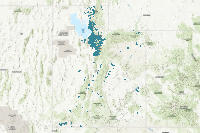

In [4]:
item = gis.content.get("4df5de727e07404785bbffa7750a09ad")
item

In [5]:
f = arcgis.features.FeatureLayerCollection.fromitem(item)
f.manager.update_definition({"editorTrackingInfo" : {"enableEditorTracking" : False}})

{'success': True}

In [6]:
#Let's make the editor tracking field editable
editFlag = True
fm = arcgis.features.managers.FeatureLayerManager.fromitem(item, layer_id=0)
fm.update_definition({"fields":[{"name":editorField,"editable":editFlag},{"name":editorDateField,"editable":editFlag}, \
                                {"name":creatorField,"editable":editFlag},{"name":creatorDateField,"editable":editFlag}]})

{'success': True}

In [7]:

results = []
for s in surveyors:
    #Now run a calculate field expression to set the Creator field from the fromUser to the toUser (ScottMooreRAD to ScottMoorePNW)
    calcExpr = []
    calcExpr.append({'field' : creatorField, 'value' : s[0]})
    #calcExpr.append({'field' : creatorDateField, 'value' : dt.datetime.now()})
    calcExpr.append({'field' : editorField, 'value' : s[0]})
    #calcExpr.append({'field' : editorDateField, 'value' : dt.datetime.now()})
    lyr = item.layers[0]
    #results = lyr.calculate(where=creatorField + " = '" + fromUser + "'",calc_expression=calcExpr)

    result = lyr.calculate(where=surveyorField + " = '" + s[1] + "'",calc_expression=calcExpr)
    results.append(result)




In [11]:
results

[{'success': True, 'updatedFeatureCount': 721},
 {'success': True, 'updatedFeatureCount': 92},
 {'success': True, 'updatedFeatureCount': 44},
 {'success': True, 'updatedFeatureCount': 54},
 {'success': True, 'updatedFeatureCount': 234},
 {'success': True, 'updatedFeatureCount': 144},
 {'success': True, 'updatedFeatureCount': 4},
 {'success': True, 'updatedFeatureCount': 61},
 {'success': True, 'updatedFeatureCount': 84},
 {'success': True, 'updatedFeatureCount': 295},
 {'success': True, 'updatedFeatureCount': 899},
 {'success': True, 'updatedFeatureCount': 995},
 {'success': True, 'updatedFeatureCount': 961},
 {'success': True, 'updatedFeatureCount': 0},
 {'success': True, 'updatedFeatureCount': 0}]

In [9]:
editFlag = False
fm.update_definition({"fields":[{"name":editorField,"editable":editFlag},{"name":editorDateField,"editable":editFlag}, \
                                {"name":creatorField,"editable":editFlag},{"name":creatorDateField,"editable":editFlag}]})

{'success': True}

In [10]:
f.manager.update_definition({"editorTrackingInfo" : {"enableEditorTracking" : True}})

{'success': True}